# Principal Component Analysis (PCA) 

~~~
Extracción de Características en Imágenes.
Master en Ciencia de Datos y Arquitectura de los Computadores.
Universidad de Granada.


Fernando Pérez Bueno - fpb@ugr.es
Rafael Molina Soriano - rms@decsai.ugr.es
~~~

Vamos a utilizar el análisis de componentes principales sobre una base de datos de caras para reducir la dimensionalidad de cada cara extrayendo un conjunto de variables latentes. Estas variables latentes podrían, con posterioridad, utilizarse, por ejemplo, en problemas de clasificación siempre que los errores de reconstrucción de las caras usando las variables latentes fuese pequeño. También podrían usarse en problemas de detección de anomalías.

La base de datos ERRDfaces.mat contiene una base de datos de caras almacenada por filas en la matriz `X`. Cada fila corresponde a una cara de 32x32=1024 píxeles niveles de gris. El número de ejemplos es N_T=5000.

Comenzamos importanto las librerías que vamos a utilizar en el desarrollo de la práctica.

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import math

Ahora modificaremos el camino donde están nuestros datos y los leemos. Observa la estructura que contiene los datos. Lee la documentación sobre la función `loadmat`.

In [2]:
path='/work/ECI_master/Data/'

dict_data = loadmat(path+'ERRDfaces_2021.mat')
print(dict)

<class 'dict'>


Como ves, los datos están almacenados en una estructura diccionario. Observa como extraemos nuestros datos usando la llave `X`. Vemos además cual es el tamaño de la base de datos

In [3]:
data= dict_data['X']
data.shape

(5000, 1024)

Usaremos las 4.500 primeras caras como ejemplos de entrenamiento y las restantes 500 como test. El conjunto de test nos servirá para probar que PCA representa suficientemente bien la información como para aplicarlo a datos que no ha visto.

Dependiendo del problema podríamos usar todas las muestras como conjunto de entrenamiento. Piensa en un conjunto, llamado de calibración, para la detección, por ejemplo, de anomalías en el conjunto de imagenes.

<br>
<div class="alert alert-block alert-info">
<b> Completa el código para que la variable X siguiente contenga las 4500 primeras caras de data y test el resto </b>
</div>

In [ ]:
N_tr=4500
X = 
test =

Las caras están almacenadas como un vector de rasgos, donde cada imagen es una única fila. 

<div class="alert alert-block alert-info">
<b>Redimensiona, es decir, pasa de un vector con 1024 componentes a una matriz 32x32, y muestra las 5 primeras caras del dataset. </b>

Pueden resultarte utiles las funciones np.reshape y plt.imshow. Como observaras deberás probablemente trasponer la matriz que contiene la cara 
</div>

In [ ]:
n_caras=5

plt.figure(figsize=(15,8))

#Introduce aquí tu código







# Normalización de los datos

Para trabajar con modelos como PCA, es necesario normalizar los datos. De otro modo, las variables con mayor rango y variación pueden ocultar la importancia de las restantes. 

<div class="alert alert-block alert-info">
<b> Usando la clase StandardScaler de sklearn normaliza los datos de entrenamiento, de forma que cada rasgo (de los 1024) tenga media cero. No realices el escalado de la varianza a uno. Los rasgos normalizados deberás almacenarlos en la variable X_norm.</b>
</div>

Ten en cuenta que más tarde tendrás que aplicar la misma normalización a los datos de test.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Introduce aquí tu código para normalizar los datos. Introduce los datos normalizados en una variable de nombre X_norm

X_norm =





<div class="alert alert-block alert-info">
<b>Escribe código, lo más eficiente posible, para comprobar que las columnas de rasgos tienen media cero.</b>
</div>

In [ ]:
# Introduce aquí tu código




# Cálculo de las PCAs 

Una vez que has normalizado los datos. Utilizaremos X_norm para calcular las componentes principales. Aunque existe una función implementada en el paquete sklearn nosotros no la utilizaremos para comprender en profundidad el funcionamiento de PCAs. No se considera válido para el desarrollo de la práctica el uso de implementaciones de PCA en sklearn o cualquier otra libreria.

<div class="alert alert-block alert-info">
<b> Utiliza la descomposición por valores sigulares sobre X_norm o X_norm traspuesta usando la función np.linalg.svd() y de ahí saca los autovectores y con los valores singulares calcula los autovalores. Alternativamente, puedes calcular los autovectores y autovalores de la matriz de covarianza muestral (mira su definición más abajo) utilizando la función np.linalg.eig(). Tal vez sería bueno que lo hicieras con los métodos y comprobases que obtienes los mismos autovalores y autovectores.</b>
</div>

Recuerda que dada X_norm su matriz de covarianza muestral es
\begin{equation}
S=X_\mbox{norm}^TX_\mbox{norm}/N_\mbox{tr}
\end{equation}

In [ ]:
#Introduce aqui tu codigo 


autovalores=

# Introduce en W los vectores que definen la transformación de PCA
W=

# Número de componentes a utilizar

Vamos ahora a determinar cuantas componentes vamos a utilizar en nuestro analisis. Cada componente adicional explica parte de la varianza de nuestros datos. Queremos encontrar cuantas componentes son necesarias para representar bien nuestros datos. 


Usando los autovalores que hemos obtenido, podemos observar que cantidad de información aporta cada una de las componentes. Las dos gráficas a continuación muestran la información de dos formas diferentes.

(<BarContainer object of 1024 artists>,
 Text(0.5,1,'Varianza explicada por cada componente'))

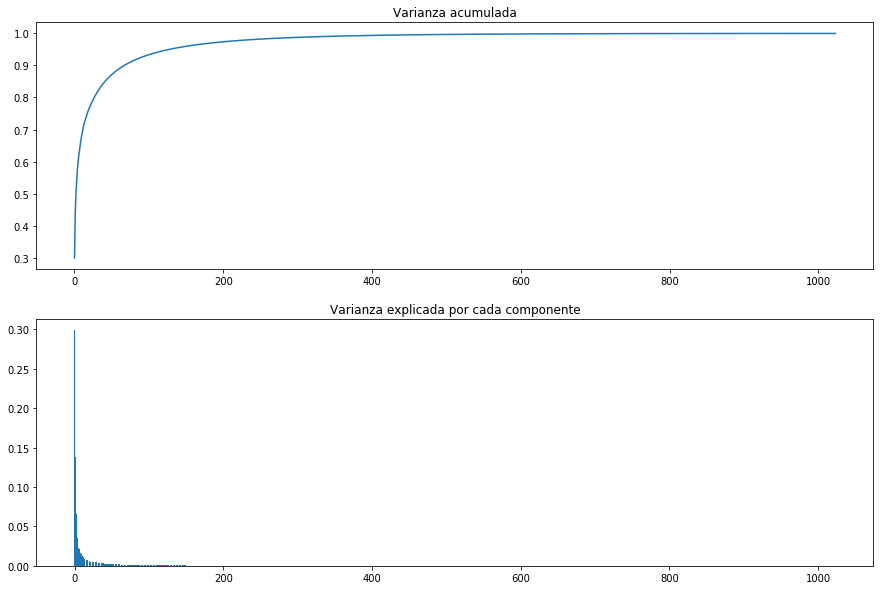

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

#Hacemos uso de la suma acumulada de los autovalores para ver la varianza acumulada
cumsum=np.cumsum(autovalores)
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(cumsum/cumsum[-1]),plt.title('Varianza acumulada')
plt.subplot(2,1,2)
#El aporte de cada autovalor a la suma total, nos muestra la varianza explicada por cada componente
plt.bar(range(autovalores.shape[0]),autovalores/np.sum(autovalores)),plt.title('Varianza explicada por cada componente')

Aunque podemos fijar el número de componentes manualmente tras estudiar los datos, es bueno que pienses como determinarías automáticamente el número de componentes a utilizar.

<div class="alert alert-block alert-info">
<b> Escribe en el cuadro siguiente qué harías para determinar cual sería un buen número de componentes. (No es necesario que lo implementes) Justifica tu respuesta.</b>
</div>

Tu respuesta:

...

# Visualización de las autocaras

En el caso de las caras, se puede apreciar muy bien la información que captura cada una de las componentes principales visualizando las llamadas autocaras que no son más que los autovectores. Cada uno de los autovectores que hemos calculado, representa elementos clave de una cara que pueden utilizarse para componer la imagen final.

<div class="alert alert-block alert-info">
 <b>Igual que hiciste con las imágenes, escribe aquí código que permita visualizar los primeros 5 autovectores en forma de imagen. Es decir, los 5 autovectores asociados a los 5 autovalores mayores. Trendras que redimensionar los vectores para darles formato de imagen.<b>
</div>

In [ ]:
#Introduce aquí tu código para representar las 5 primeras autocaras




<div class="alert alert-block alert-info">
 <b>Escribe aquí el código que permita visulizar los cinco últimos 5 autovectores en forma de imagen. Es decir, los 5 autovectores asociados a los 5 menores autovalores.</b>
</div>

In [ ]:
#Introduce aquí tu código para representar las 5 últimas




¿Por qué son tan diferentes? 

<div class="alert alert-block alert-info">
    <b>Escribe tu respuesta en la celda siguiente</b>
</div>

Tu respuesta:

...

# Cálculo de las componentes principales de los datos

Hasta ahora hemos obtenido los vectores (autovectores o autocaras) que definen el subespacio donde vamos a proyectar los datos, mira la celda de código debajo de la definición de la matriz de covarianza muestral,  y hemos visto que cantidad de varianza explica cada uno de ellos. 

Vamos a fijar el número de autocaras a 250, es decir n_componentes=250.

<div class="alert alert-block alert-info">
<b> Extrae de W los n_componentes autovectores asociados a los n_componentes mayores autovalores y almacénalos en Wd. 
    
A continuación obtén el valor de las componentes principales (variables latentes) de nuestros datos y almacénalos en Z. Observa que lo que estamos haciendo es proyectar nuestros datos originales X_norm en el espacio definido por Wd.</b>
</div>

In [ ]:
n_componentes=250

# Wd contendrá los autovectores correspondientes a las n_componentes principales

Wd=

# Z contendrá las proyecciones de nuestros datos en el espacio latente

Z=

print(Z.shape)

# Visualización de las primeras componentes


Podemos visualizar la primera y la segunda componentes para ver que información nos aportan sobre nuestros datos. 

<div class="alert alert-block alert-info">
<b>Crea dos gráficas separadas. Una que muestre solo la primera componente (variable latente) y otra que incluya las dos primeras (variables latentes) de todo el conjunto de entrenamiento.</b>
</div>

In [ ]:
# Incluye aquí el código de la creación de las gráficas





<div class="alert alert-block alert-info">
    <b> Comenta en la siguiente celda los resultados obtenidos</b>
</div>

Tu respuesta:

...

# Recuperacion de los datos

A partir de las variables latentes almacenadas en Z, cada una de sus filas contiene la representación latente de cada uno de los ejemplos (filas) en X_norm, podemos reconstruir los datos. Observa que hemos pasado de 1024 rasgos a n_componentes. 

<div class="alert alert-block alert-info">
    <b> Utiliza Z y los autovectores en Wd para reconstruir las caras originales. </b>
</div>
   
Ten en cuenta que tendrás que deshacer la normalización de los datos una vez que hayas recuperado la dimensionalidad original.

In [ ]:
#Introduce aquí tu código para recuperar los datos

X_norm_recovered =

X_recovered = 

<div class="alert alert-block alert-info">
    <b> Muestra las 5 primeras caras de la base de datos original y su reconstrucción. Si has hecho los pasos correctamente, la reconstrucción debe ser similar al original</b>
</div>

In [ ]:
# Muestra 5 caras del dataset original y las mismas 5 caras reconstruidas






<div class="alert alert-block alert-info">
    <b> ¿Qué ocurre si aumentamos o disminuímos el número n_componentes?.</b>
</div>

Incluye aquí tu respuesta

...


# Medición del error de reconstrucción

Según el número de componentes que hayamos utilizado, habremos perdido más o menos información. Podemos comprobarlo haciendo uso del error cuadratico medio (MSE). 

<div class="alert alert-block alert-info">

Usando los datos originales de entrenamiento X y la reconstrucción que has obtenido, calcula el MSE que has cometido con cada una de las imágenes en X. 

In [ ]:
#Introduce aquí tu código para calcular el MSE. Si lo has hecho bien, obtendrás un valor para cada elemento (fila) 
# de X.

mse=


<div class="alert alert-block alert-info">
    <b>Haciendo uso del error cuadrático medio identifica y muestra la imagen original y la reconstruida en los siguientes casos: la imagen peor reconstruida, la imagen mejor reconstruida.</b>
</div>




In [ ]:
# Incluye el código para encontrar en el conjunto de entregamiento las imágenes peor y mejor reconstruidas usando el
# error cuadrático medio y muéstrales.





<div class="alert alert-block alert-info">
    <b> ¿Podrías explicar por qué son estas las caras que aparecen?</b>
</div>

Incluye en la siguiente celda tu respuesta.


Tu respuesta:

...

# Aplicando el modelo a datos nuevos 

Los autovectores o autocaras que hemos encontrado haciendo uso de X deberian ser suficientemente buenos para representar otros datos del mismo tipo. Vamos a comprobarlo haciendo uso del pequeño conjunto de test que separamos al principio de la práctica.

Utilizando los autovectores que ya has calculado, sigue los mismos pasos con las imagenes de test y comprueba que el funcionamiento es adecuado. 

<div class="alert alert-block alert-info">
    <b> Normaliza las instancias de test</b>
</div>

In [ ]:
# Normalización de los datos de test. (No olvides que no puedes utilizar información obtenida del propio 
# conjunto de test)

test_norm =

<div class="alert alert-block alert-info">
    <b> Obtén las variables latentes y reconstruye las caras del conjunto de test.</b>
</div>

In [ ]:
# Obtenición de las variables latentes y reconstrucción de las caras de test.

Z_test=

Test_norm_recovered =

Test_recovered =


<div class="alert alert-block alert-info">
    <b> Muestra las cinco primeras caras del conjunto de test y sus reconstrucciones.</b>
</div>

In [ ]:
# Muestra 5 caras del conjunto de test y sus respectivas reconstrucciones





# Detección de anomalías

En el conjunto de test hay una imagen anómala que no se corresponde con el resto del dataset. ¿Como la identificarias automaticamente utilizando lo que has aprendido?

<div class="alert alert-block alert-info">
    <b> Identifica y muestra la anomalía oculta en el conjunto de test. Muestra también la reconstrucción que hemos obtenido de esa anomalía.</b>
</div>

In [ ]:
# Identifica la anomalía en el conjunto de test.



<div class="alert alert-block alert-info">
    <b> ¿Qué es lo que nos permite identificar la imagen como anomalía? ¿Por qué se reconstruye de esa manera?</b>
</div>

Tu respuesta:

...